# XGboost using the foxtrot API

In [3]:
import numpy
import pandas as pd
import talib
from prices import get_indicators
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt


In [4]:
func_groups = talib.get_function_groups()

# remove these ones cus they are useless
# not really suitiable to be "features"
func_groups.pop('Math Operators')
func_groups.pop('Math Transform')

feature_name_list = []
for group in func_groups:
    feature_name_list = feature_name_list + func_groups[group]

In [5]:
# remove this shitty fucking feature causing all the errors fuck you
feature_name_list.remove('MAVP')

In [6]:
tickers = pd.read_csv("tickers.csv")
SNP_500 = tickers[' Symbol'].to_list()

In [7]:
data = get_indicators(['AAPL'], feature_name_list, 1000, 'day')

In [8]:
# df list for concatenation
df_list = []
labels_list = []
for instrument in data['stock_data'].keys():
    df = pd.DataFrame.from_records(data['stock_data'][instrument])
    # normalize label
    label = df['open'].pct_change().shift(6)
    # drop the first 50 rows to avoid nans
    label = label.iloc[100:]
    df = df.iloc[100:]
    # append to respective lists
    labels_list.append(label)
    df_list.append(df)
features = pd.concat(df_list)
labels = pd.concat(labels_list)

In [9]:
features = features.set_index(['symbol', 'timestamp']).astype(float)

In [10]:
X_train, X_test = features[:int(len(features) * 0.75)], features[int(len(features) * 0.75):] 
y_train, y_test = labels[:int(len(labels) * 0.75)], labels[int(len(labels) * 0.75):] 

model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=64,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=694201337,
    verbosity=1
)
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE : {mae:.4f}")
print(f"Test R²  : {r2:.4f}")

[0]	validation_0-rmse:0.01434	validation_1-rmse:0.02084
[1]	validation_0-rmse:0.01345	validation_1-rmse:0.02056
[2]	validation_0-rmse:0.01255	validation_1-rmse:0.01994
[3]	validation_0-rmse:0.01178	validation_1-rmse:0.01946
[4]	validation_0-rmse:0.01100	validation_1-rmse:0.01916
[5]	validation_0-rmse:0.01033	validation_1-rmse:0.01890
[6]	validation_0-rmse:0.00970	validation_1-rmse:0.01877
[7]	validation_0-rmse:0.00919	validation_1-rmse:0.01866
[8]	validation_0-rmse:0.00867	validation_1-rmse:0.01868
[9]	validation_0-rmse:0.00818	validation_1-rmse:0.01868
[10]	validation_0-rmse:0.00771	validation_1-rmse:0.01874
[11]	validation_0-rmse:0.00736	validation_1-rmse:0.01873
[12]	validation_0-rmse:0.00692	validation_1-rmse:0.01873
[13]	validation_0-rmse:0.00660	validation_1-rmse:0.01882
[14]	validation_0-rmse:0.00621	validation_1-rmse:0.01886
[15]	validation_0-rmse:0.00596	validation_1-rmse:0.01883
[16]	validation_0-rmse:0.00562	validation_1-rmse:0.01894
[17]	validation_0-rmse:0.00536	validation

In [11]:
name = 'test1'
resolution = 'test1'
model_name = f'models/{str(name)}_{str(resolution)}.json'
model.save_model(model_name)

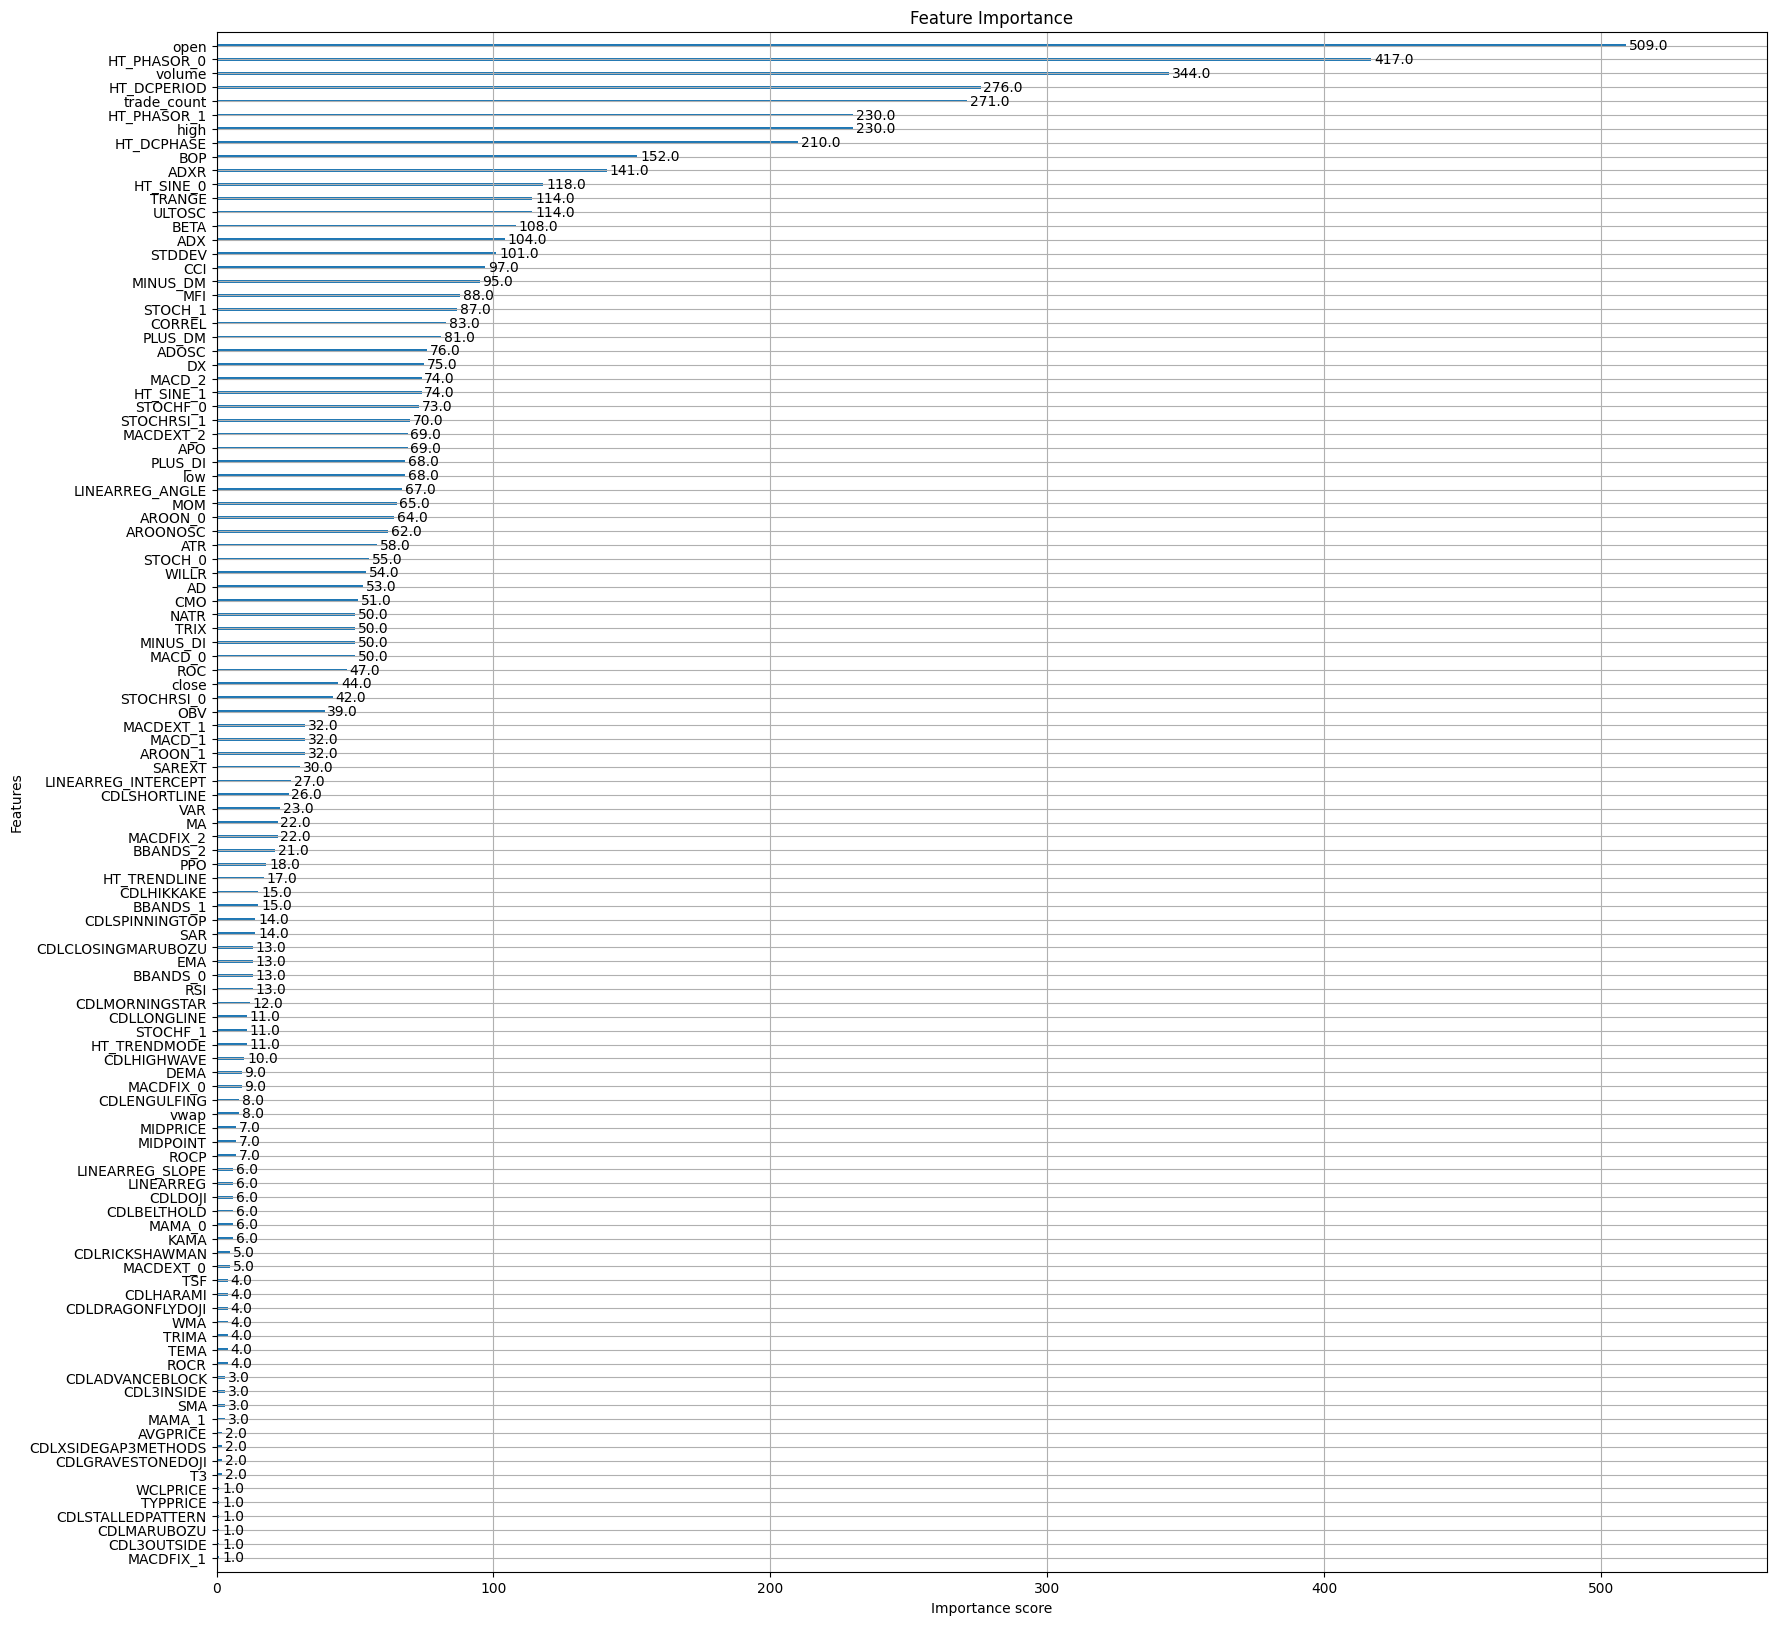

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_importance(model, ax=ax)
plt.title('Feature Importance')
plt.show()

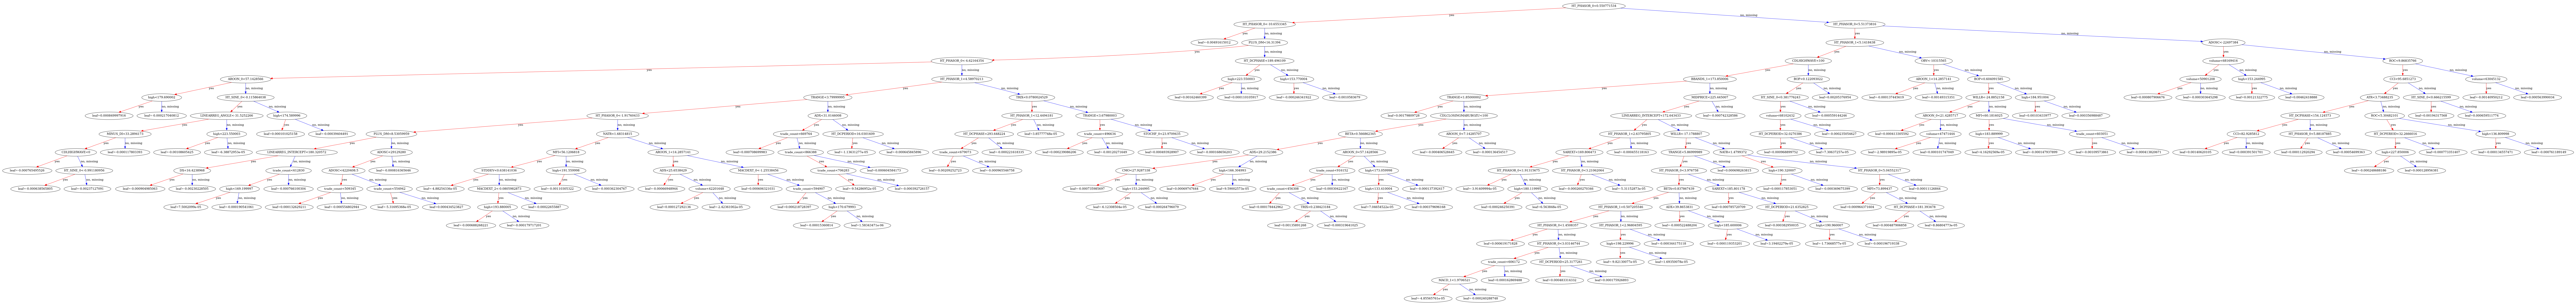

In [15]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (index 0)
fig, ax = plt.subplots(figsize=(200, 200))  # You can adjust the size
plot_tree(model, tree_index=998, ax=ax)      # model is your XGBRegressor or XGBClassifier
plt.show()

In [6]:
name = "BTC/USD"
split_name = name.split('/')
split_name[0]

'BTC'

## Run the below code block to train the Xgboost model (on your own PC not the server)

This process should take around 10-20min depending on how good your computer is

In [2]:
import numpy
import pandas as pd
import talib
from prices import get_indicators
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

from price_pred import get_snp_100, train_model, format_data

CRYPTO = ['BTC/USD', 'DOGE/USD', 'ETH/USD', 'LINK/USD', 'LTC/USD',
          'SUSHI/USD', 'UNI/USD', 'YFI/USD']

timeframes = ["min", "hour", "day"]

for coin in CRYPTO:
    for timeframe in timeframes:
        features, labels = format_data(coin, timeframe)
        # trains the model and saves it to the models folder
        print(f"training: {coin} {timeframe}")
        train_model(features, labels, coin, timeframe)

SNP_100 = get_snp_100()

for instrument in SNP_100:
    for timeframe in timeframes:
        features, labels = format_data(instrument, timeframe)
        print(f"training: {instrument} {timeframe}")
        train_model(features, labels, instrument, timeframe)



training: BTC/USD min
training: BTC/USD hour
training: BTC/USD day
training: DOGE/USD min
training: DOGE/USD hour
training: DOGE/USD day
training: ETH/USD min
training: ETH/USD hour
training: ETH/USD day
training: LINK/USD min
training: LINK/USD hour
training: LINK/USD day
training: LTC/USD min
training: LTC/USD hour
training: LTC/USD day
training: SUSHI/USD min
training: SUSHI/USD hour
training: SUSHI/USD day
training: UNI/USD min
training: UNI/USD hour
training: UNI/USD day
training: YFI/USD min
training: YFI/USD hour
training: YFI/USD day
training: MMM min
training: MMM hour
training: MMM day
training: AOS min
training: AOS hour
training: AOS day
training: ABT min
training: ABT hour
training: ABT day
training: ABBV min
training: ABBV hour
training: ABBV day
training: ACN min
training: ACN hour
training: ACN day
training: ADBE min
training: ADBE hour
training: ADBE day
training: AMD min
training: AMD hour
training: AMD day
training: AES min
training: AES hour
training: AES day
traini

/home/john/SENG3011-Foxtrot/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:27:49] WARNING: /workspace/src/common/error_msg.cc:52: Empty dataset at worker: 0
  bst.update(dtrain, iteration=i, fobj=obj)


training: AZO hour
training: AZO day
training: AVB min
training: AVB hour
training: AVB day
training: AVY min
training: AVY hour
training: AVY day
training: AXON min
training: AXON hour
training: AXON day
training: BKR min
training: BKR hour
training: BKR day
training: BALL min
training: BALL hour
training: BALL day
training: BAC min
training: BAC hour
training: BAC day
training: BAX min
training: BAX hour
training: BAX day
training: BDX min
training: BDX hour
training: BDX day
training: BRK.B min
training: BRK.B hour
training: BRK.B day
training: BBY min
training: BBY hour
training: BBY day
training: TECH min
training: TECH hour
training: TECH day
training: BIIB min
training: BIIB hour
training: BIIB day
training: BLK min
training: BLK hour
training: BLK day
training: BX min
training: BX hour
training: BX day
training: BK min
training: BK hour
training: BK day
training: BA min
training: BA hour
training: BA day
training: BKNG min
training: BKNG hour
training: BKNG day
training: BSX mi

In [1]:
from price_pred import get_prediction

get_prediction('BTC/USD', 'day')

{'pred': -0.02152305655181408}